In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
import seaborn as sb
import scipy as sc
from scipy import stats as st

In [65]:
source_data_path = "./data/tcs_stock.csv"

In [66]:
row_df = pd.read_csv(source_data_path)

In [67]:
# For this Lab we choose records with Party = PS and territoryName = Porto 
# full_df = row_df[(row_df['Party'] == 'PS') & (row_df['territoryName'] == 'Porto')]
full_df = row_df
full_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2015-12-24,TCS,EQ,2425.80,2421.00,2438.20,2404.00,2435.00,2434.25,2424.03,421580,1.021924e+14,21932,188670,0.4475
244,2015-12-28,TCS,EQ,2434.25,2428.00,2466.40,2420.20,2456.95,2462.70,2455.00,1852099,4.546896e+14,43390,1060100,0.5724
245,2015-12-29,TCS,EQ,2462.70,2458.35,2465.30,2445.75,2449.35,2455.80,2452.26,854262,2.094875e+14,26975,433986,0.5080
246,2015-12-30,TCS,EQ,2455.80,2453.05,2459.00,2412.30,2421.70,2418.30,2442.06,802881,1.960682e+14,49464,632180,0.7874


## Step 1. Choose subsample with main variables for your further analysis. 

###  For this lab you need subsample with 3-5 random variables, at least half of them should be described with continuous random variable type

numParishesApproved (numeric): Number of parishes approved in this location   
votersPercentage (numeric): Percentage of voters   
blankVotesPercentage (numeric): Percentage of blank votes   
validVotesPercentage (numeric): Percentage of valid votes in a party   

In [68]:
df = full_df[['Open', 'High', 'Low', 'Close']]
df

,Open,High,Low,Close
0,2567.00,2567.00,2541.00,2545.55
1,2551.00,2590.95,2550.60,2579.45
2,2581.00,2599.90,2524.65,2540.25
3,2529.10,2529.10,2440.00,2446.60
4,2470.00,2479.15,2407.45,2417.70
...,...,...,...,...
243,2421.00,2438.20,2404.00,2434.25
244,2428.00,2466.40,2420.20,2462.70
245,2458.35,2465.30,2445.75,2455.80
246,2453.05,2459.00,2412.30,2418.30


## Step 2. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).

(for each variable)

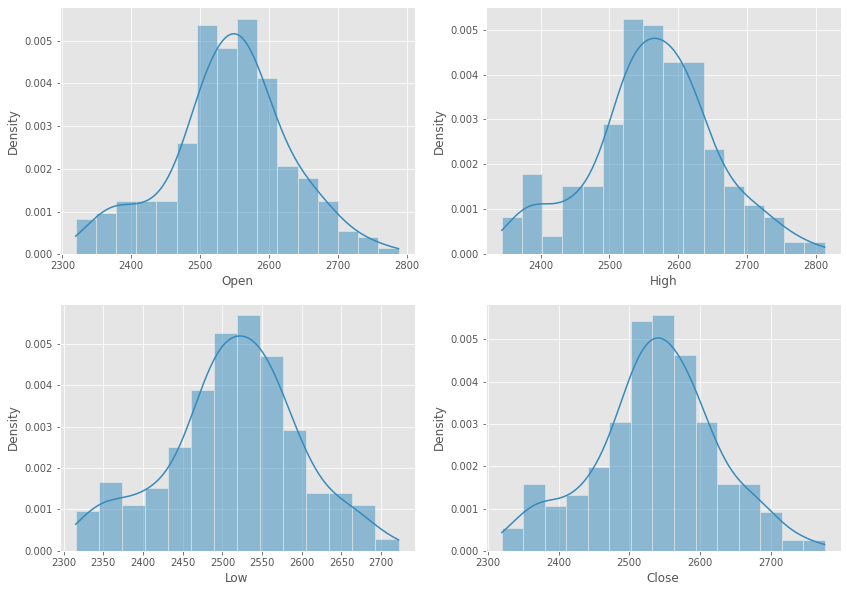

In [69]:
# initialize figure canvas
fig, ax = pyplot.subplots(2, 2, figsize=(14,10))
sb.histplot(df['Open'], ax=ax[0,0], kde=True, stat="density")
sb.histplot(df['High'], ax=ax[0,1], kde=True, stat="density")
sb.histplot(df['Low'], ax=ax[1,0], kde=True, stat="density")
sb.histplot(df['Close'], ax=ax[1,1], kde=True, stat="density")

pyplot.show()

## Step 3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot.
we will find quintiles estimations


In [70]:
def quantilies(c):
    return [
        np.quantile(c, 0.1),
        np.quantile(c, 0.25), 
        np.quantile(c, 0.5), 
        np.quantile(c, 0.75),
        np.quantile(c, 0.9)
    ]

open_v = df['Open'].to_numpy()
open_v_quantiles = quantilies(open_v)

high = df['High'].to_numpy()
high_quantiles = quantilies(high)

last = df['Low'].to_numpy()
last_quantiles = quantilies(last)

close = df['Close'].to_numpy()
close_quantiles = quantilies(close)

print('Open: ', open_v_quantiles)
print('High: ', high_quantiles)
print('Low: ', last_quantiles)
print('Close: ', close_quantiles)

Open:  [2418.69, 2499.5, 2548.5, 2594.25, 2651.16]
High:  [2438.1549999999997, 2518.9, 2566.0, 2615.75, 2678.785]
Low:  [2400.455, 2472.1000000000004, 2520.0, 2567.2999999999997, 2611.8900000000003]
Close:  [2417.43, 2495.1499999999996, 2541.4750000000004, 2592.0, 2648.885]


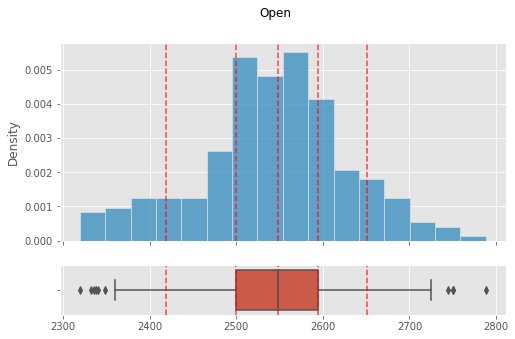

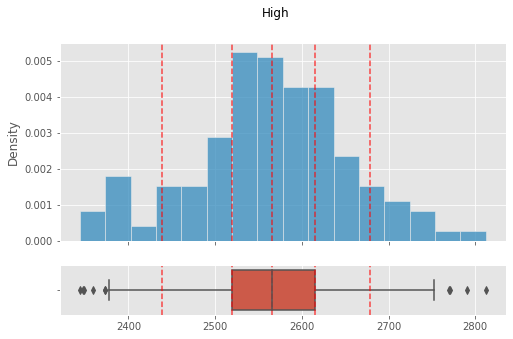

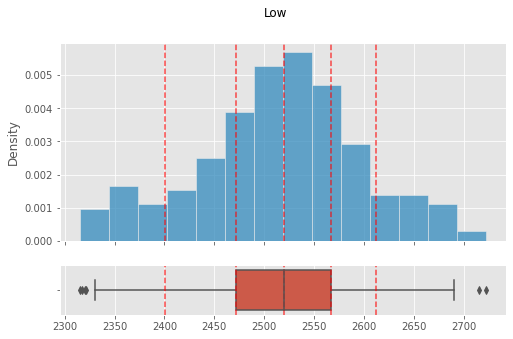

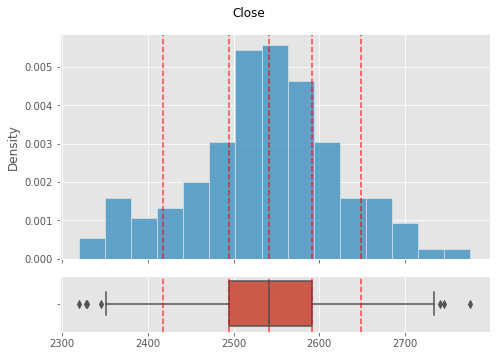

In [33]:
def drow(title, method, data, quantiles, width = 7):
    fig, ax = pyplot.subplots(2,1, figsize=(width, 5), sharex=True, gridspec_kw={'height_ratios': [2,0.5]})
    fig.suptitle(title)
    
    sb.histplot(data, ax=ax[0], kde = False, stat=method)
    for q in quantiles:
        ax[0].axvline(q, color='r', linestyle='--', alpha=0.7)

    sb.boxplot(x=data, ax=ax[1])
    for q in quantiles:
        ax[1].axvline(q, color='r', linestyle='--', alpha=0.7)

drow('Open', 'density', open_v, open_v_quantiles, 8)
drow('High', 'density', high, high_quantiles, 8)
drow('Low', 'density', last, last_quantiles, 8)
drow('Close', 'density', close, close_quantiles)

pyplot.tight_layout()
pyplot.show()

## Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.

/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:801: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:805: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 81.9.
  warnings.warn(
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 80.6.
  warnings.warn(
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:28

/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 244.0533976245523.
  warnings.warn(
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 246.46325954085802.
  warnings.warn(
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 241.10243255953299.
  warnings.warn(
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 246.73383465536517.
  warnings.warn(
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2804: RuntimeWarning: The shape param

/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1647: RuntimeWarning: overflow encountered in exp
  return np.exp(self._logpdf(x, K))
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1726: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2492: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2951: RuntimeWarning: divide by zero encountered in power
  tmp0 = tmp**(limit-1)
/home/mike/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2952: RuntimeWarning: invalid value encountered in multiply

{<scipy.stats._continuous_distns.laplace_gen object at 0x7f80595f5940>: [1.328883578274103e-06, (), 2520.0, 64.04838709677419], <scipy.stats._continuous_distns.loglaplace_gen object at 0x7f805961adc0>: [1.4161990070332683e-06, (39.18516955081586,), -1.3695109121288673, 2521.369510907769], <scipy.stats._continuous_distns.foldcauchy_gen object at 0x7f8059d1aca0>: [2.235455726454337e-06, (55.16844084327158,), -0.5288068528354953, 45.70299378039776], <scipy.stats._continuous_distns.cauchy_gen object at 0x7f8059d0c190>: [2.2407869512788144e-06, (), 2520.831456165653, 45.69051655576435], <scipy.stats._continuous_distns.hypsecant_gen object at 0x7f80595fd070>: [2.4389392051020754e-06, (), 2518.1033675522694, 54.92219865179014], <scipy.stats._continuous_distns.dgamma_gen object at 0x7f8059d158b0>: [2.8348986153450413e-06, (1.2981250181253503,), 2514.4284895416376, 49.4586318546279], <scipy.stats._continuous_distns.genlogistic_gen object at 0x7f80595dd880>: [2.8681166724273777e-06, (0.707835557

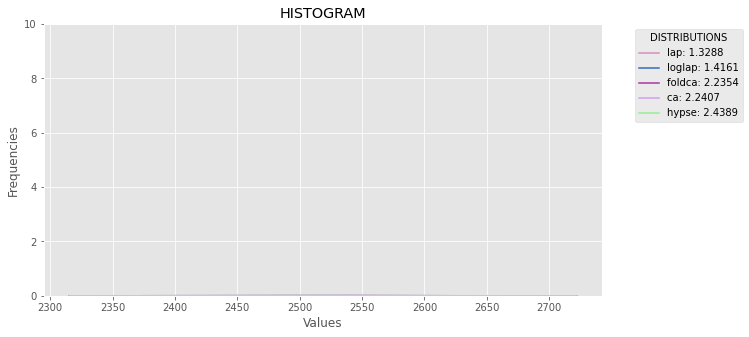

In [94]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random

mpl.style.use("ggplot")

def danoes_formula(data):
    """
    DANOE'S FORMULA
    https://en.wikipedia.org/wiki/Histogram#Doane's_formula
    """
    N = len(data)
    skewness = st.skew(data)
    sigma_g1 = math.sqrt((6*(N-2))/((N+1)*(N+3)))
    num_bins = 1 + math.log(N,2) + math.log(1+abs(skewness)/sigma_g1,2)
    num_bins = round(num_bins)
    return num_bins

def plot_histogram(data, results, n):
    ## n first distribution of the ranking
    N_DISTRIBUTIONS = {k: results[k] for k in list(results)[:n]}

    ## Histogram of data
#     plt.axis((2,50,25,250))
    plt.figure(figsize=(10, 5))
    plt.hist(data, density=True, ec='white', color=(63/235, 149/235, 170/235))
    plt.title('HISTOGRAM')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')

    ## Plot n distributions
    for distribution, result in N_DISTRIBUTIONS.items():
        # print(i, distribution)
        sse = result[0]
        arg = result[1]
        loc = result[2]
        scale = result[3]
        x_plot = np.linspace(min(data), max(data), 1000)
        y_plot = distribution.pdf(x_plot, loc=loc, scale=scale, *arg)
        plt.plot(x_plot, y_plot, label=str(distribution)[32:-34] + ": " + str(sse)[0:6], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
    
    plt.ylim(top=10) #ymax is your value
    plt.legend(title='DISTRIBUTIONS', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def fit_data(data):
    ## st.frechet_r,st.frechet_l: are disbled in current SciPy version
    ## st.levy_stable: a lot of time of estimation parameters
    ALL_DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm, st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    
    MY_DISTRIBUTIONS = [st.invgauss]

    ## Calculae Histogram
    num_bins = danoes_formula(data)
    frequencies, bin_edges = np.histogram(data, num_bins, density=True)
    central_values = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

    results = {}
    for distribution in ALL_DISTRIBUTIONS:
        ## Get parameters of distribution
        params = distribution.fit(data)
        
        ## Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
    
        ## Calculate fitted PDF and error with fit in distribution
        pdf_values = [distribution.pdf(c, loc=loc, scale=scale, *arg) for c in central_values]
        
        ## Calculate SSE (sum of squared estimate of errors)
        sse = np.sum(np.power(frequencies - pdf_values, 2.0))
        
        ## Build results and sort by sse
        results[distribution] = [sse, arg, loc, scale]
        
    results = {k: results[k] for k in sorted(results, key=results.get)}
    return results
        
    ## Import data
data = df['Low']
results = fit_data(data)
print(results)
plot_histogram(data, results, 5)
# Надо отрисовать каждое из распределений

#votersPercentage - pearson3 
#blankVotesPercentage - cauchy
#validVotesPercentage - invgauss

#Open - laplace
#High - hypsecant
#Last - laplace
#Close - laplace / normal

## Step 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.

In [71]:
from scipy.stats import laplace, hypsecant

open_MLE = laplace.fit(df['Open'], method='MLE')
open_MM = laplace.fit(df['Open'], method='MM')

high_MLE = hypsecant.fit(df['High'], method='MLE')
high_MM = hypsecant.fit(df['High'], method='MM')

low_MLE = laplace.fit(df['Low'], method='MLE')
low_MM = laplace.fit(df['Low'], method='MM')

close_MLE = laplace.fit(df['Close'], method='MLE')
close_MM = laplace.fit(df['Close'], method='MM')

print('Open')
print(f'MLE: {open_MLE}\nMM: {open_MM}', end='\n\n')

print('High')
print(f'MLE: {high_MLE}\nMM: {high_MM}', end='\n\n')

print('Low')
print(f'MLE: {low_MLE}\nMM: {low_MM}', end='\n\n')

print('Close')
print(f'MLE: {close_MLE}\nMM: {close_MM}')

Open
MLE: (2548.5, 66.47842741935482)
MM: (2542.172782258064, 61.82156520956231)

High
MLE: (2566.1139624858956, 59.51842636604291)
MM: (2563.580443548387, 57.56031103934551)

Low
MLE: (2520.0, 64.04838709677419)
MM: (2514.4084677419355, 58.53809307762597)

Close
MLE: (2541.4750000000004, 66.76834677419355)
MM: (2537.717943548387, 61.43493431703764)


## Step 6. Validate your estimated parameters using QQ biplots.

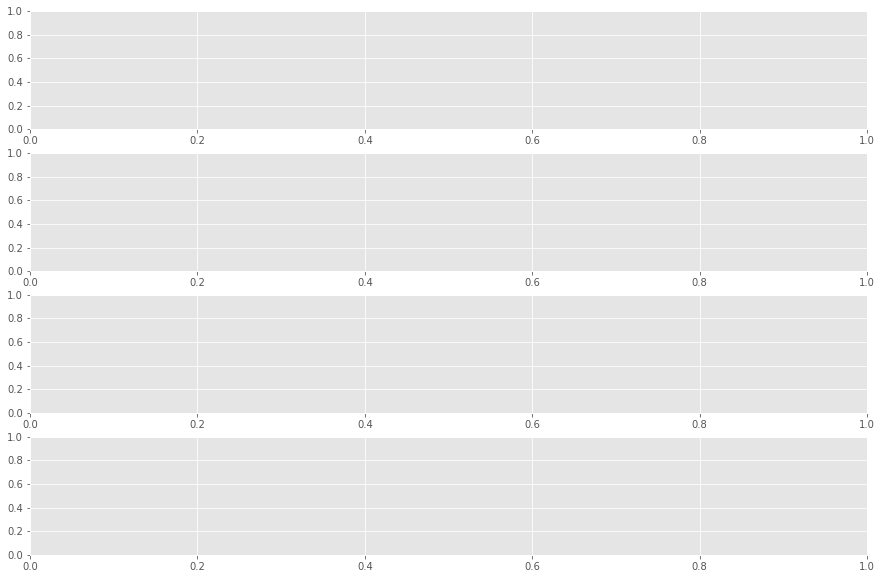

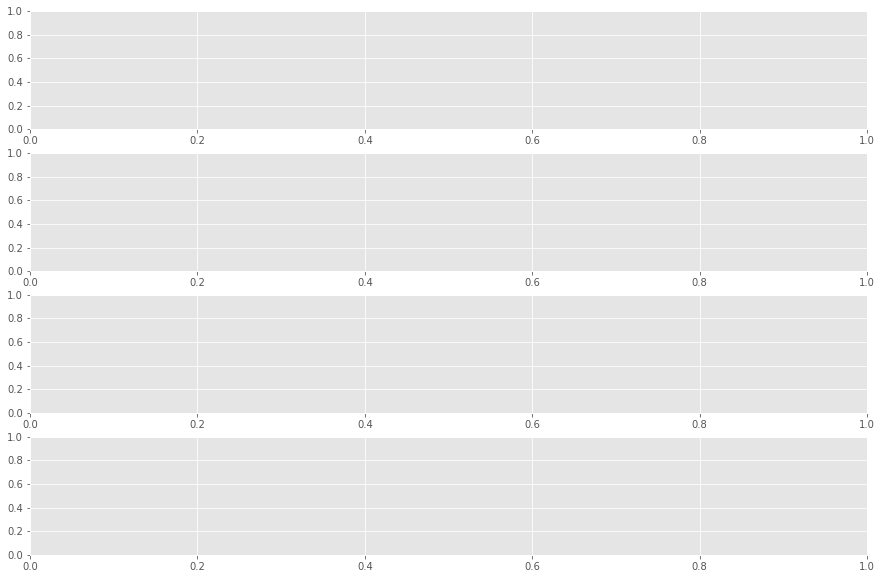

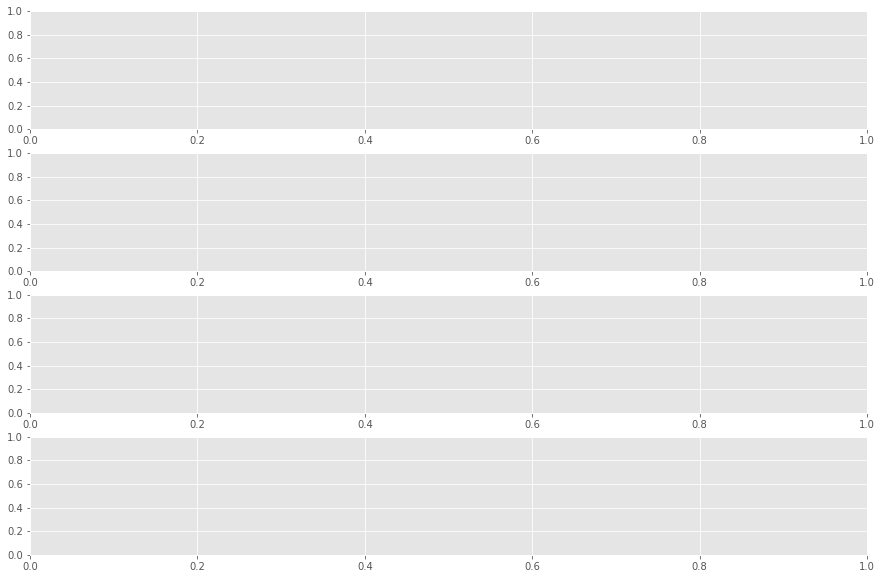

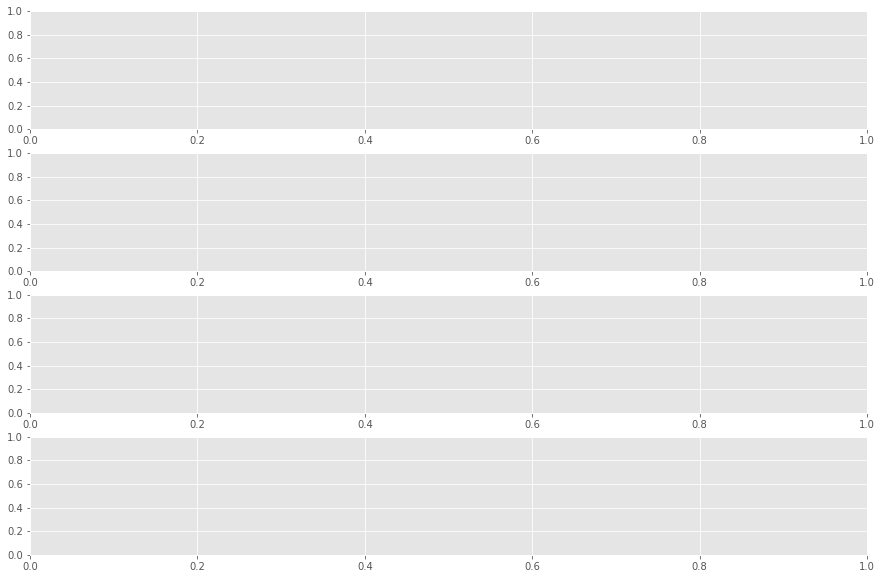

In [49]:
import math

columns = ['Open', 'High', 'Low', 'Close']
df_dist = [laplace, hypsecant, laplace, laplace]


for i, col in enumerate(columns):
    feature = df[col]
    dist = df_dist[i]
    
    percs = np.linspace(0,100,21)
    qn_feature = np.percentile(feature, percs)    
    x = np.linspace(np.min(feature), np.max(feature))

#     fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharey=True)

    
#     fig_row = 2
#     fig_col = 1

#     figsize = (24,10) if fig_row > 1 else (24, 5)
#     fig, ax = plt.subplots(fig_row, fig_col, figsize=figsize, sharey=True)
#     fig.suptitle('QQ-Plot {} Top 3 Distribution'.format(col), fontsize=15, fontweight='bold')

#     axs = trim_axs(ax, len(df_dist[i]))

#     # percentile data
#     percs = np.linspace(0,100,21)
#     qn_feature = np.percentile(feature, percs)    
#     x = np.linspace(np.min(feature), np.max(feature))

#     for ax, row in zip(axs, df_dist[i].iterrows()):
        
#         row = row[1]
#         dist = getattr(scipy.stats, row['distribution'])
#         params = row['{}_params'.format(columns[i])]
        
#         # theoritical distribution percentile
#         qn_dist = dist.ppf(percs / 100.0, *params)

#         # plot QQ-Plot
#         ax.plot(qn_feature, qn_dist, ls='', marker='o')
#         ax.plot(x, x, color='k', ls='--')

#         # set XY label
#         ax.set_xlabel('Empirical distribution')
#         ax.set_ylabel('Theoritical ({}) distribution'.format(row['distribution']))    
        
#         # set plot title
#         ax.text(0,ax.get_ylim()[1] - 0.05, 'p-value: {:.4f}'.format(row[columns[i]+'_kstest']))
#         ax.text(0,ax.get_ylim()[1] - 0.1, 'chi2: {:.4f}'.format(row[columns[i]+'_chi2']))        
        
#         # 'p-value: {:.2f}'.format(row[columns[i]+'_kstest'])
#         ax.set_title('{} distribution'.format(row['distribution']))   

# plt.tight_layout()
# plt.show()

## Step 7. Estimate correctness of fitted distributions using at least 2 statistical tests.

In [110]:
columns = ['Open', 'High', 'Low', 'Close']
dist = [st.laplace, st.hypsecant, st.laplace, st.laplace]

for col, dst in list(zip(columns, dist)):    
    a, b = dst.fit(df[col])
    l1 = dst(a, b)

    print("Result for", col)
    print("kstest: p-value = ", st.kstest(data, l1.cdf).pvalue)
    print("cramervonmises: p-value = ", st.cramervonmises(data, l1.cdf).pvalue)

#     st.chisquare(data, l1.cdf)
# print(t.pvalue)
# t
# for col, dst in list(zip(columns, dist)):    
#     print(col)
#     print(dst)
#     print('-----')
#     print('{} variable - {}'.format(col, dst))
    
    
            
#     print('kstest p-value: ', )
#     print('chi2 p-value: ', df['{}_chi2'.format(col)][0])
#     print()

Result for Open
kstest: p-value =  1.4527107738687808e-08
cramervonmises: p-value =  8.567850873220095e-10
Result for High
kstest: p-value =  5.367561046762377e-17
cramervonmises: p-value =  7.122014089588902e-11
Result for Low
kstest: p-value =  0.4962830863565647
cramervonmises: p-value =  0.5120218278609918
Result for Close
kstest: p-value =  1.236970815340803e-05
cramervonmises: p-value =  2.37003721959006e-06
